In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dias = [1,2,3,4,7,8,9,10,11,14,15,16,17,18,21,22,23,24,25,28,29,30,31]
dol = [4.1740 , 4.1546,4.1012,4.0610,4.0688,4.0868,4.0954,4.1145,4.1060,4.1263,4.1488,4.1714,4.1457,4.1376,4.1319,4.0858,4.0721,4.0089,4.0133,3.9793,3.9946,4.0186,4.0041]

tam = len(dias)

coeficientes = []
dados = []

for n in range(tam):
    print("\n")
    for k in range(n+1,tam):
        if(n+1 > tam):
            break
        # operacao com inversa de matriz para obter a resolucao do sistema de equacoes
        A = np.array([[dias[n], 1], [dias[k], 1]])
        B = np.array([dol[n], dol[k]])
        X = np.linalg.inv(A).dot(B)

        print("Equações (x,y) -> (%d, %f) , (%d, %f)" %(dias[n], dol[n], dias[k], dol[k]))

        # adiciona os dados das duas funcoes, que foram usadas para encontrar os coeficiente (m,b)
        # mantendo uma referência entre os index's
        dados.append([ ( dias[n], dol[n]) ,  (dias[k], dol[k] ) ])
        coeficientes.append(X)
        print("Solução do sistema ->", X)

# o minimo é um valor muito grande inicialmente, para que qualquer valor seja menor que o inicial

minimo = 1212133123123131313232
index = 0
for i in range(len(coeficientes)):
    soma = 0
    for n in range(tam):
        # soma os módulos de cada função com os valores de (m,b) encontrados na iteração anterior
        soma += abs(dias[n]*coeficientes[i][0] + coeficientes[i][1] - dol[n])
    
    #verifica se a soma atual é a mínima
    if(soma < minimo):
        minimo = soma

        #obtem o número da interação atual, para recuperar os dados dos coeficientes
        index = i





Equações (x,y) -> (1, 4.174000) , (2, 4.154600)
Solução do sistema -> [-0.0194  4.1934]
Equações (x,y) -> (1, 4.174000) , (3, 4.101200)
Solução do sistema -> [-0.0364  4.2104]
Equações (x,y) -> (1, 4.174000) , (4, 4.061000)
Solução do sistema -> [-0.03766667  4.21166667]
Equações (x,y) -> (1, 4.174000) , (7, 4.068800)
Solução do sistema -> [-0.01753333  4.19153333]
Equações (x,y) -> (1, 4.174000) , (8, 4.086800)
Solução do sistema -> [-0.01245714  4.18645714]
Equações (x,y) -> (1, 4.174000) , (9, 4.095400)
Solução do sistema -> [-0.009825  4.183825]
Equações (x,y) -> (1, 4.174000) , (10, 4.114500)
Solução do sistema -> [-0.00661111  4.18061111]
Equações (x,y) -> (1, 4.174000) , (11, 4.106000)
Solução do sistema -> [-0.0068  4.1808]
Equações (x,y) -> (1, 4.174000) , (14, 4.126300)
Solução do sistema -> [-3.66923077e-03  4.17766923e+00]
Equações (x,y) -> (1, 4.174000) , (15, 4.148800)
Solução do sistema -> [-1.8000e-03  4.1758e+00]
Equações (x,y) -> (1, 4.174000) , (16, 4.171400)
Soluç

Equações (x,y) -> (17, 4.145700) , (28, 3.979300)
Solução do sistema -> [-0.01512727  4.40286364]
Equações (x,y) -> (17, 4.145700) , (29, 3.994600)
Solução do sistema -> [-0.01259167  4.35975833]
Equações (x,y) -> (17, 4.145700) , (30, 4.018600)
Solução do sistema -> [-0.00977692  4.31190769]
Equações (x,y) -> (17, 4.145700) , (31, 4.004100)
Solução do sistema -> [-0.01011429  4.31764286]


Equações (x,y) -> (18, 4.137600) , (21, 4.131900)
Solução do sistema -> [-1.9000e-03  4.1718e+00]
Equações (x,y) -> (18, 4.137600) , (22, 4.085800)
Solução do sistema -> [-0.01295  4.3707 ]
Equações (x,y) -> (18, 4.137600) , (23, 4.072100)
Solução do sistema -> [-0.0131  4.3734]
Equações (x,y) -> (18, 4.137600) , (24, 4.008900)
Solução do sistema -> [-0.02145  4.5237 ]
Equações (x,y) -> (18, 4.137600) , (25, 4.013300)
Solução do sistema -> [-0.01775714  4.45722857]
Equações (x,y) -> (18, 4.137600) , (28, 3.979300)
Solução do sistema -> [-0.01583  4.42254]
Equações (x,y) -> (18, 4.137600) , (29, 3.99

In [3]:
m = [ x[0] for x in coeficientes]
b = [ x[1] for x in coeficientes]
df = pd.DataFrame({"Dia (x)": dias, "Valor Dólar (y)": dol })
df

,Dia (x),Valor Dólar (y)
0,1,4.1740
1,2,4.1546
2,3,4.1012
3,4,4.0610
4,7,4.0688
5,8,4.0868
6,9,4.0954
7,10,4.1145
8,11,4.1060
9,14,4.1263


In [4]:
df = pd.DataFrame({"Mínimo:": [minimo], "Coenficiente Angular(m)": [m[index]], "Constante(b)": [b[index]]})
df

,Mínimo:,Coenficiente Angular(m),Constante(b)
0,0.8474,-0.005013,4.164625


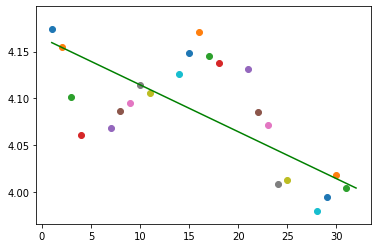

In [8]:
def grafico():
    
    # a e b corresponde ao intervalo no eixo x que o gráfico irá mostra --> [a,b]
    x = np.linspace(1,32,1000)
    
    plt.figure()
    # desenha um ponto no gráfico, no a raiz da função no intervalo dado
    for i in range(tam):
        plt.scatter( dias[i] , dol[i])
    
    plt.plot(x , coeficientes[index][0]*x + b[index], 'k', color='green')
    plt.show()
    
    
grafico()